Importing The Dependencles

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn import metrics

Data Collection & Analtsis

In [40]:
# loading the dataset from csv file to a Pandas Dataframe
big_mart_data = pd.read_csv('/content/Test.csv')

In [29]:
# first 5 rows of the dataFrame
big_mart_data.head()

,ID,W,G,R,AB,H,1B,2B,3B,HR,BB,SO,SB,CS,HBP,BBHBP,SF,Outs,Outsinplay,RA,BA,OBA,SLG,OPS
0,1,60,162,558,5336,1280,891,247,31,111,460,840,144,80,0,460,0,4056,3216,740,0.239880,0.300207,0.360195,0.660402
1,3,86,161,677,5620,1492,1147,216,46,83,531,752,172,62,0,531,0,4128,3376,643,0.265480,0.328890,0.364591,0.693480
2,5,79,162,679,5550,1496,1088,262,63,83,543,879,207,89,0,543,0,4054,3175,710,0.269550,0.334646,0.384324,0.718971
3,7,96,162,780,5536,1458,990,265,40,163,561,933,129,39,0,561,0,4078,3145,682,0.263367,0.331146,0.414017,0.745164
4,9,96,162,688,5441,1354,905,247,21,181,542,1384,64,31,55,597,35,4087,2703,548,0.248851,0.321258,0.401764,0.723022


In [30]:
# number of data points & number of Featueres
big_mart_data.shape

(581, 24)

In [31]:
# getting some information about thye dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          581 non-null    int64  
 1   W           581 non-null    int64  
 2   G           581 non-null    int64  
 3   R           581 non-null    int64  
 4   AB          581 non-null    int64  
 5   H           581 non-null    int64  
 6   1B          581 non-null    int64  
 7   2B          581 non-null    int64  
 8   3B          581 non-null    int64  
 9   HR          581 non-null    int64  
 10  BB          581 non-null    int64  
 11  SO          581 non-null    int64  
 12  SB          581 non-null    int64  
 13  CS          581 non-null    int64  
 14  HBP         581 non-null    int64  
 15  BBHBP       581 non-null    int64  
 16  SF          581 non-null    int64  
 17  Outs        581 non-null    int64  
 18  Outsinplay  581 non-null    int64  
 19  RA          581 non-null    i

Categorical Features:-

* Item_Identifier
* Item_Fat_Content
* ltem-Type
* Outlet_ldentifer
* Outlet_Location_Type
* Outlet_Type



In [32]:
# checking for missing values
big_mart_data.isnull().sum()

,0
ID,0
W,0
G,0
R,0
AB,0
H,0
1B,0
2B,0
3B,0
HR,0


Handing Missing Values

* Mean --> Average value
* Mode --> Most repeated value

In [41]:
# mean value of "Item_Weight" column
big_mart_data['Item_Weight'].mean()

np.float64(12.695633368756642)

In [42]:
# filling the missing values in "Item_Weight" colusm with "Mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

/tmp/ipython-input-42-1378231059.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)


In [43]:
# checking for missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


Replacing the missing values in "Outlet_size" with mode

In [44]:
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:x.mode()[0]))

In [46]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [45]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [47]:
print(missing_values)

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool


In [48]:
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [49]:
# checking for missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


Data Analysis

In [50]:
# statistical measures about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Numerical Features

In [51]:
sns.set()

/tmp/ipython-input-52-1330319193.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


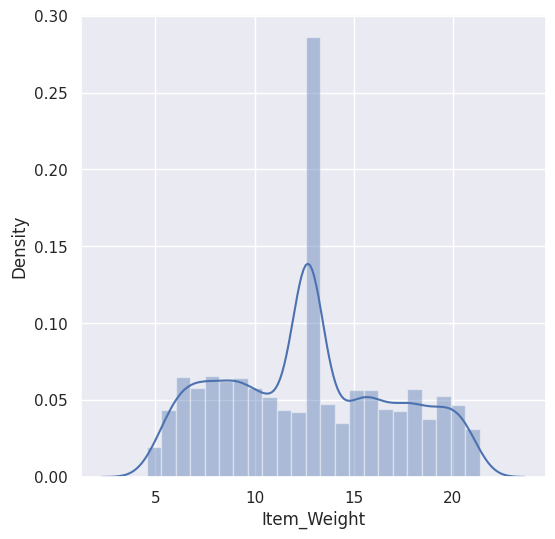

In [52]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

/tmp/ipython-input-53-700083092.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


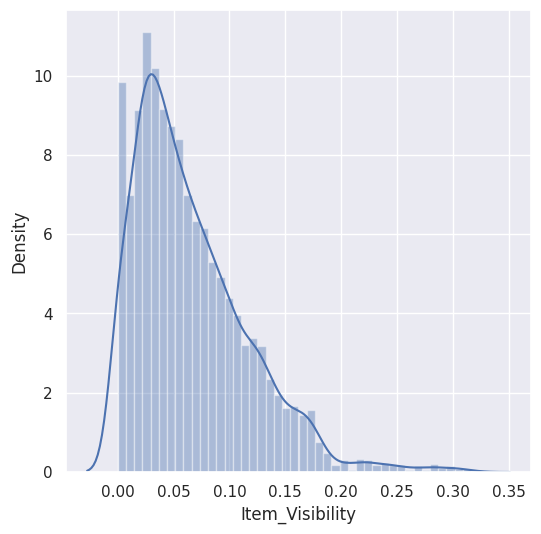

In [53]:
# Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

/tmp/ipython-input-54-1631568549.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


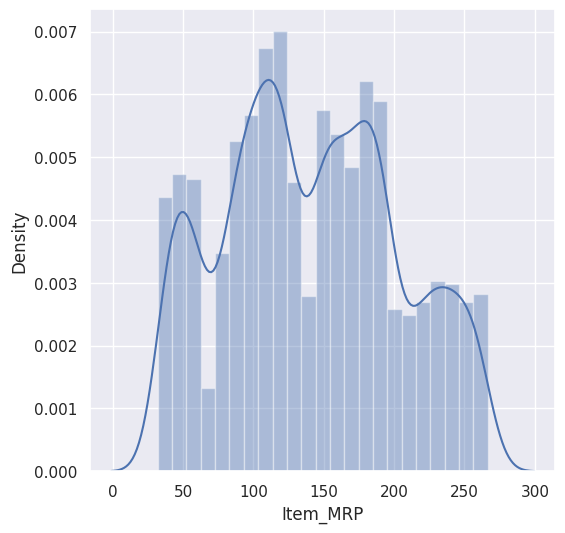

In [54]:
# Item_MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

/tmp/ipython-input-55-546143070.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Outlet_Establishment_Year'])


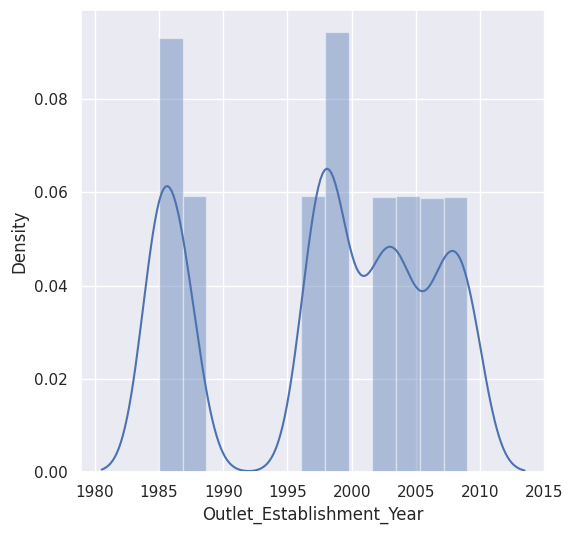

In [55]:
# Outlet_Establishment_Year distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Outlet_Establishment_Year'])
plt.show()

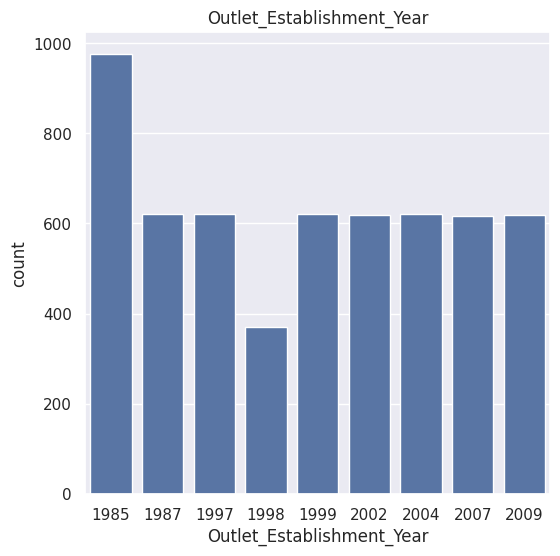

In [57]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
plt.title('Outlet_Establishment_Year')
sns.countplot(data = big_mart_data, x = 'Outlet_Establishment_Year')
plt.show()

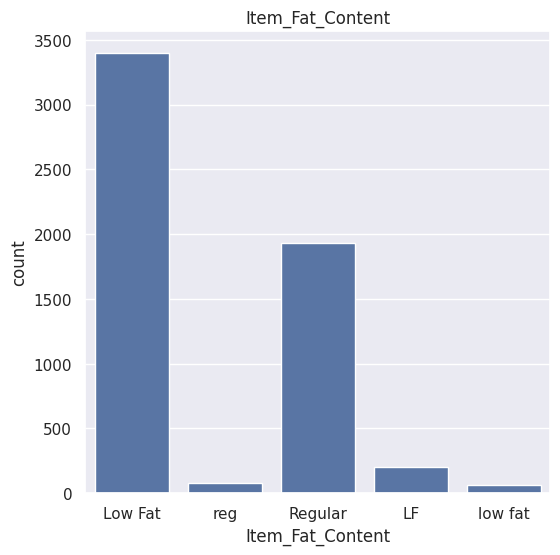

In [58]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
plt.title('Item_Fat_Content')
sns.countplot(data = big_mart_data, x = 'Item_Fat_Content')
plt.show()

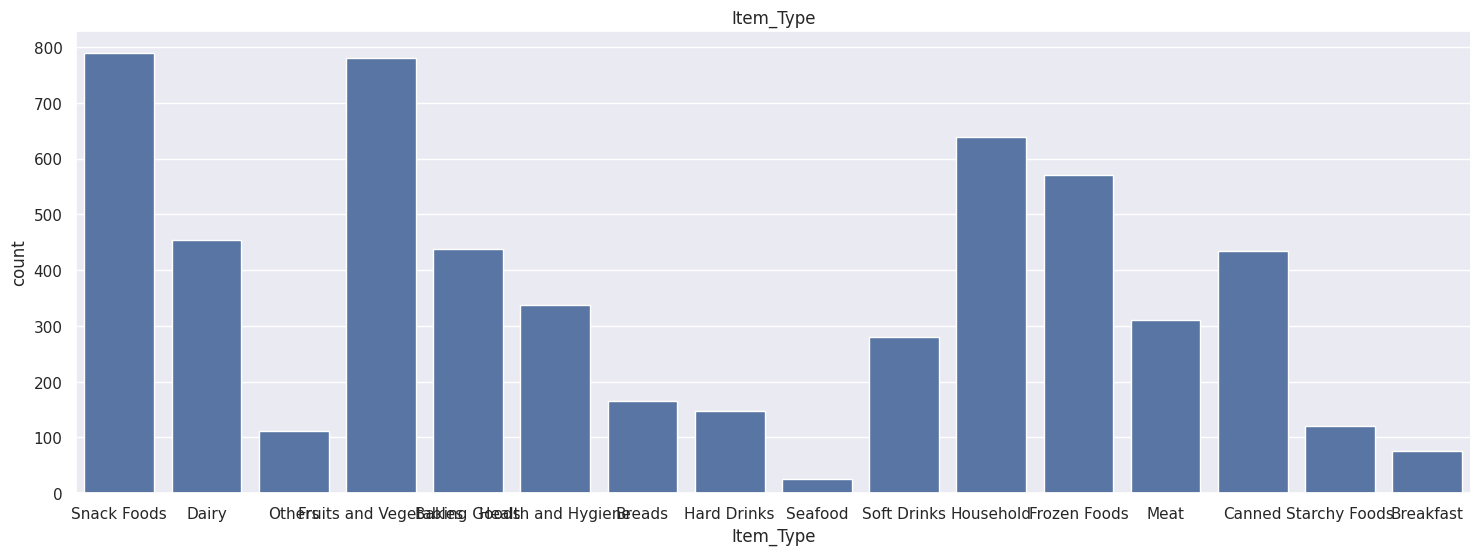

In [63]:
# Item_Type column
plt.figure(figsize=(18,6))
plt.title('Item_Type')
sns.countplot(data = big_mart_data, x = 'Item_Type')
plt.show()

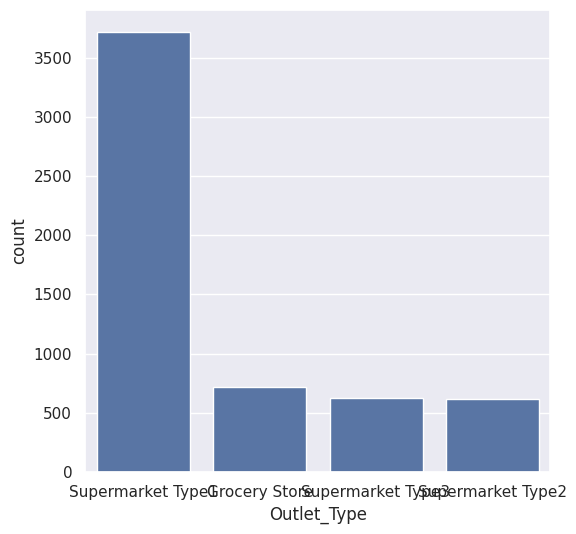

In [67]:
# Outlet_Type column
plt.figure(figsize=(6,6))
sns.countplot(data = big_mart_data, x = 'Outlet_Type')
plt.show()

Data Pre-Processing

In [68]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [69]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [71]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [72]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3668
Regular,2013


Label Encoding

In [77]:
encoder = LabelEncoder()

In [78]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [79]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


Splitting features and target

In [88]:
# Pass

In [89]:
print(X)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                1103    20.750000  ...                     0            1
1                1067     8.300000  ...                     1            1
2                1406    14.600000  ...                     2            0
3                 809     7.315000  ...                     1            1
4                1184    12.695633  ...                     2            3
...               ...          ...  ...                   ...          ...
5676              231    10.500000  ...                     0            1
5677              306     7.600000  ...                     2            2
5678             1412    10.000000  ...                     1            1
5679              517    15.300000  ...                     1            1
5680              987     9.500000  ...                     1            1

[5681 rows x 10 columns]


In [90]:
print(Y)

0       9
1       2
2       0
3       2
4       5
       ..
5676    8
5677    3
5678    7
5679    2
5680    7
Name: Outlet_Identifier, Length: 5681, dtype: int64


In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [85]:
print(X.shape, X_train.shape, X_test.shape)

(5681, 10) (4544, 10) (1137, 10)


XGBoost Regressor

In [86]:
regressor = XGBClassifier()

In [87]:
regressor.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Evaluation

In [91]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [93]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [94]:
print('R Squared Value = ', r2_train)

R Squared Value =  1.0


In [95]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [96]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [97]:
print('R Squared value = ', r2_test)

R Squared value =  1.0
